#**Exploratory Data Analysis(EDA)**

### **To understand the type of data in df1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To understand the type of data
print(df1.dtypes)



User ID                                    object
Age                                         int64
Gender                                     object
Location                                   object
Occupation                                 object
Login_successfully                          int64
Profile_Update_successfully                 int64
Search_successfully                         int64
Messaging_successfully                      int64
Content_Upload_successfully                 int64
Content_Download_successfully               int64
Comment_successfully                        int64
Like_successfully                           int64
Share_successfully                          int64
Follow_Unfollow_successfully                int64
Navigation_Path                            object
User_Feedback                              object
Support_Interaction                        object
Churned                                    object
A/B_Test_Group                             object


### **To check for missing values**

In [ ]:
# To check for missing values
print(df1.isnull().sum())



User ID                            0
Age                                0
Gender                             0
Location                           0
Occupation                         0
Login_successfully                 0
Profile_Update_successfully        0
Search_successfully                0
Messaging_successfully             0
Content_Upload_successfully        0
Content_Download_successfully      0
Comment_successfully               0
Like_successfully                  0
Share_successfully                 0
Follow_Unfollow_successfully       0
Navigation_Path                    0
User_Feedback                      0
Support_Interaction                0
Churned                            0
A/B_Test_Group                     0
A/B_Test_Result                    0
Account_Creation_Date              0
Last_Login_Date                    0
Login_Usage_Count                  0
Login_Usage_Duration               0
Profile_Update_Usage_Count         0
Profile_Update_Usage_Duration      0
S

### **Scaling the numerical data**

In [ ]:
#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a new DataFrame with only numerical columns
df_numeric = df1.select_dtypes(include=[np.number])

# Min-Max Normalization
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


# Standardization (Z-score Normalization)
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


In [ ]:
# Check if there are any negative values in the DataFrame
negative_values = df_minmax.lt(0).sum().sum()

if negative_values > 0:
    print(f"There are {negative_values} negative values in the DataFrame.")
else:
    print("There are no negative values in the DataFrame.")


There are no negative values in the DataFrame.


In [ ]:
# Check if there are any negative values in each column of the DataFrame
negative_values = df_minmax.lt(0).sum()

print("Number of negative values in each column:")
print(negative_values)

Number of negative values in each column:
Age                                0
Login_successfully                 0
Profile_Update_successfully        0
Search_successfully                0
Messaging_successfully             0
Content_Upload_successfully        0
Content_Download_successfully      0
Comment_successfully               0
Like_successfully                  0
Share_successfully                 0
Follow_Unfollow_successfully       0
Login_Usage_Count                  0
Login_Usage_Duration               0
Profile_Update_Usage_Count         0
Profile_Update_Usage_Duration      0
Search_Usage_Count                 0
Search_Usage_Duration              0
Messaging_Usage_Count              0
Messaging_Usage_Duration           0
Content_Upload_Usage_Count         0
Content_Upload_Usage_Duration      0
Content_Download_Usage_Count       0
Content_Download_Usage_Duration    0
Comment_Usage_Count                0
Comment_Usage_Duration             0
Like_Usage_Count                 

### **Correlation Diagram**

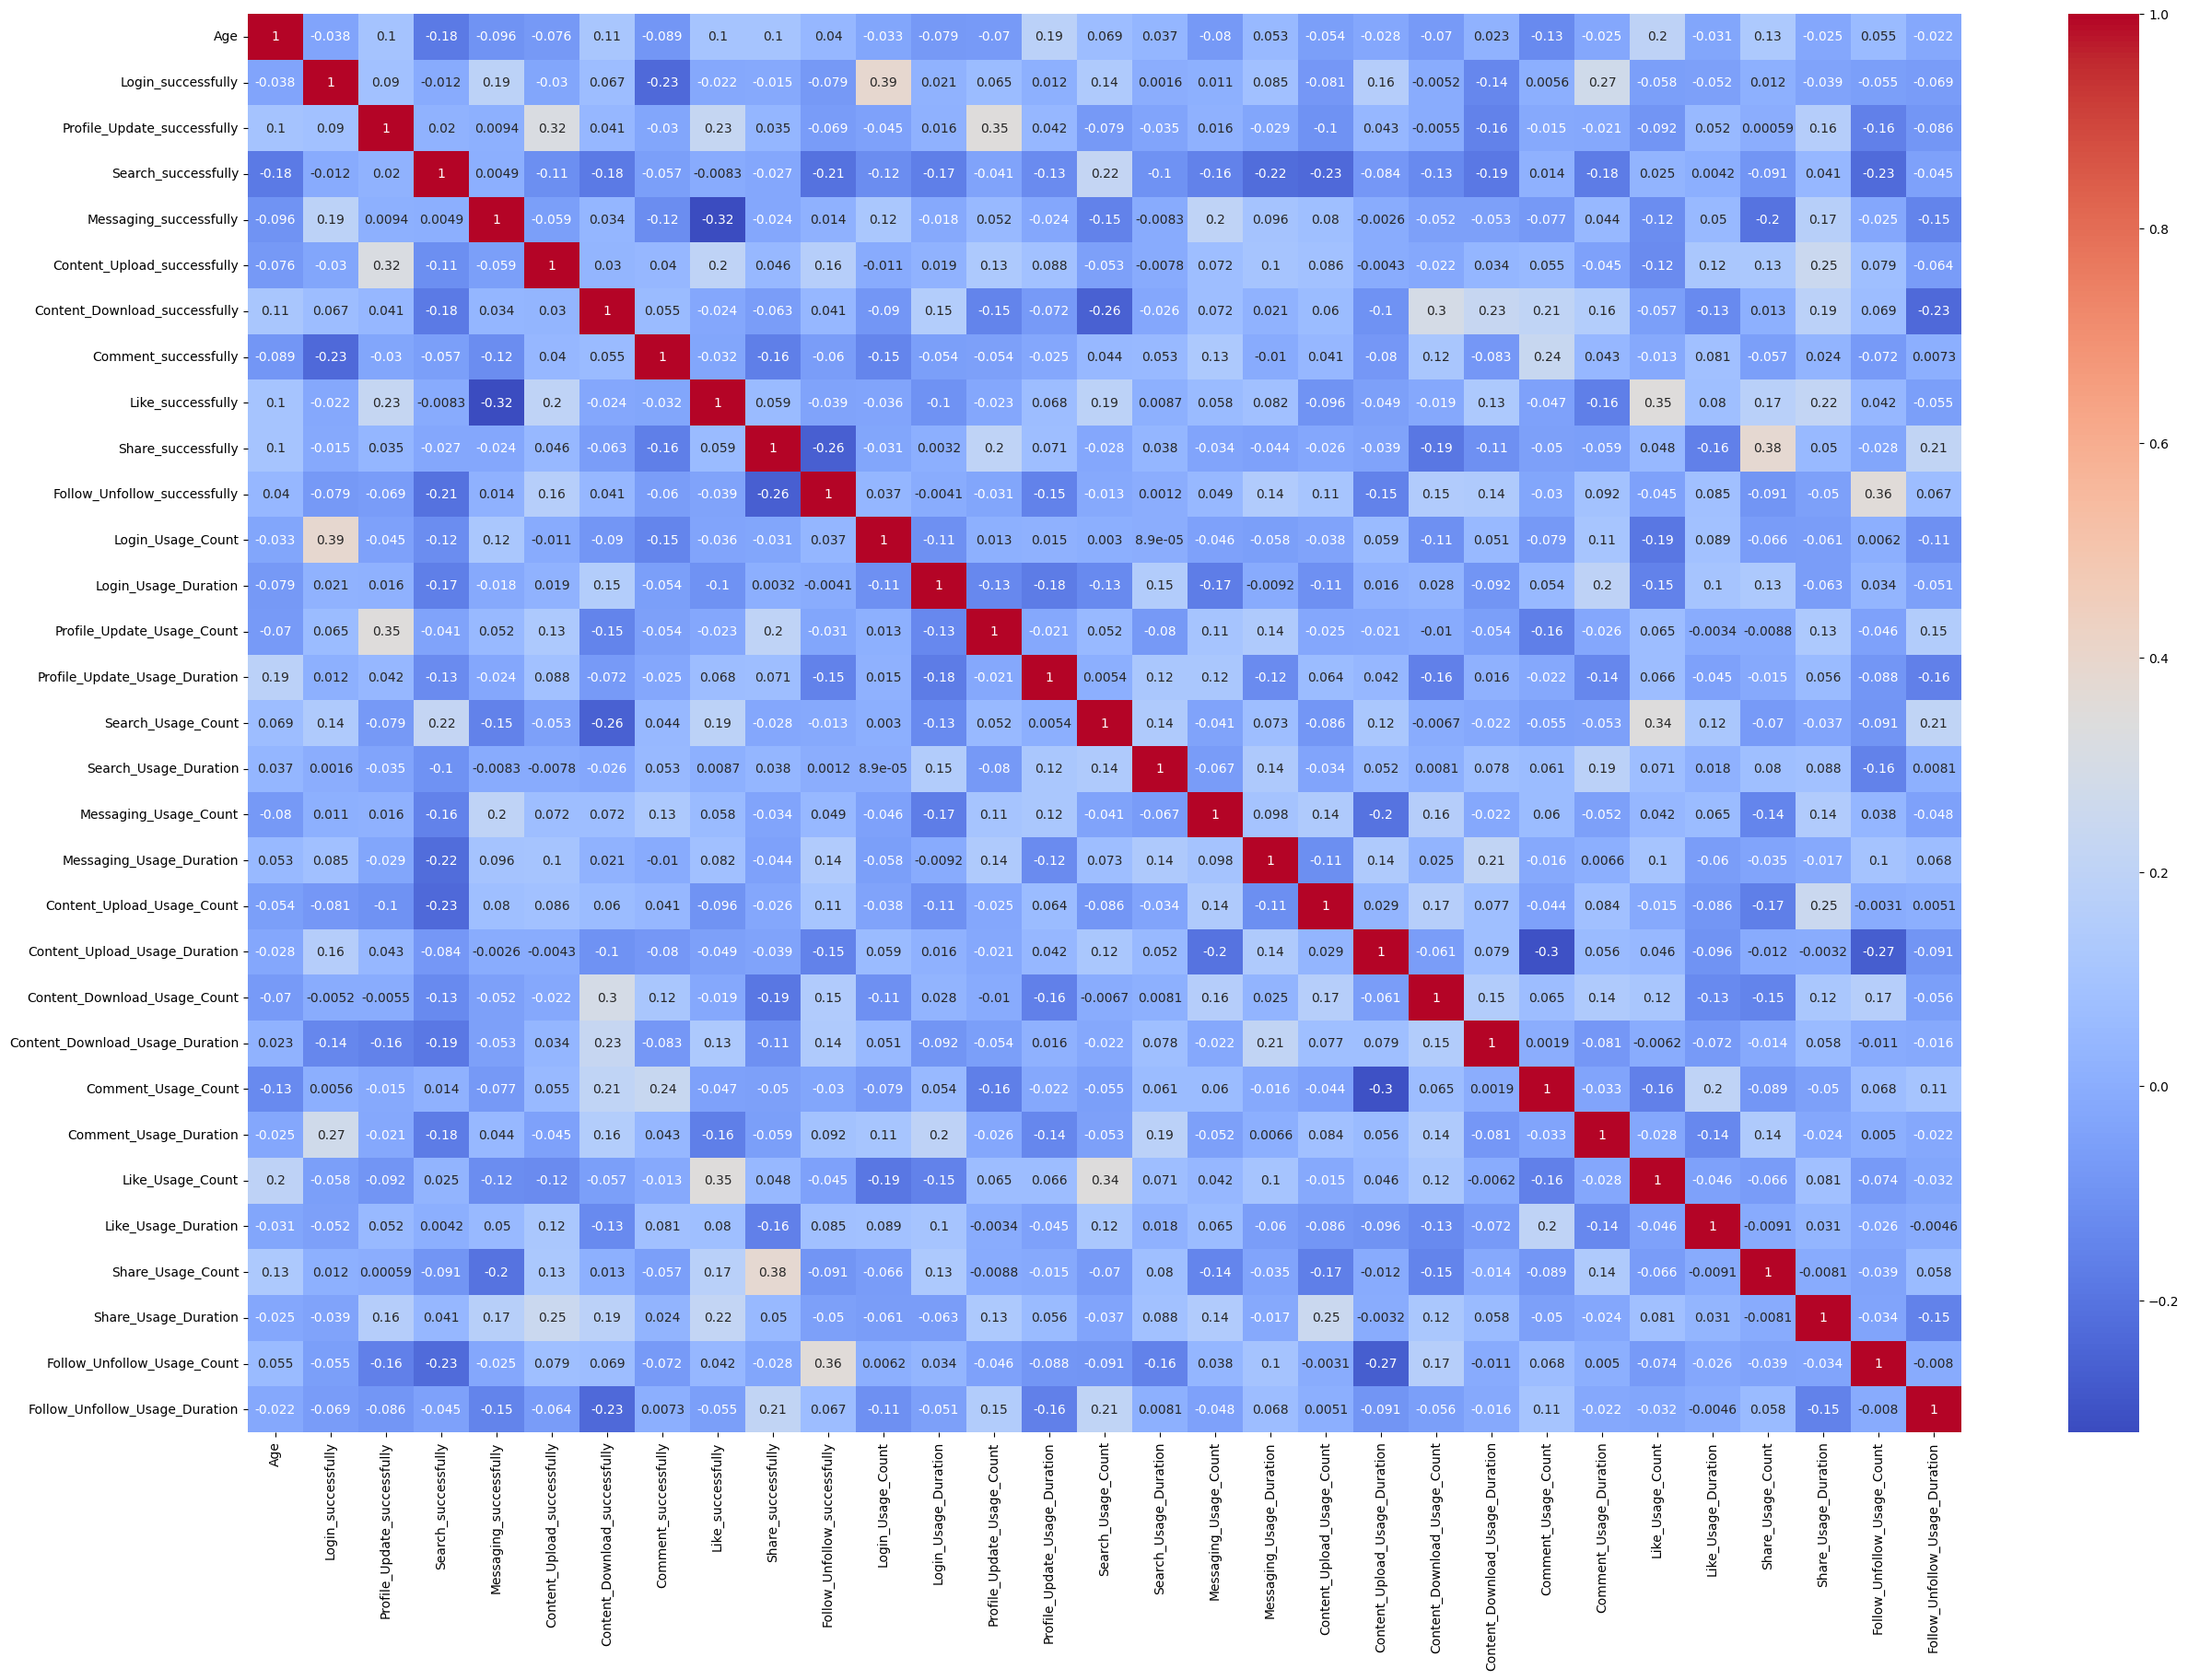

In [ ]:
# Create a new DataFrame with only numerical columns
#df_numeric = df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
corr = df_minmax.corr()
#corr = df_standard.corr()

# And plot it
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### **Feature Engineering**

In [ ]:
# For feature engineering, it depends on the specific features of your dataset.
# But here's an example of binning a numerical feature into categories
df1['Age_Group'] = pd.cut(df1['Age'], bins=[0, 18, 35, 60, np.inf], labels=['<18', '18-35', '36-60', '>60'])



In [ ]:
# You can also create new features based on existing ones
df1['Total_Usage_Count'] = df1['Login_Usage_Count'] + df1['Profile_Update_Usage_Count'] + df1['Search_Usage_Count'] + df1['Messaging_Usage_Count'] + df1['Content_Upload_Usage_Count'] + df1['Content_Download_Usage_Count'] + df1['Comment_Usage_Count'] + df1['Like_Usage_Count'] + df1['Share_Usage_Count'] + df1['Follow_Unfollow_Usage_Count']

In [ ]:
# Get a list of categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['User ID', 'Gender', 'Location', 'Occupation', 'Navigation_Path',
       'User_Feedback', 'Support_Interaction', 'Churned', 'A/B_Test_Group',
       'A/B_Test_Result', 'Tested_Feature', 'Change_Description'],
      dtype='object')


### **Age_Group vs Feature used sucessfully correlation**




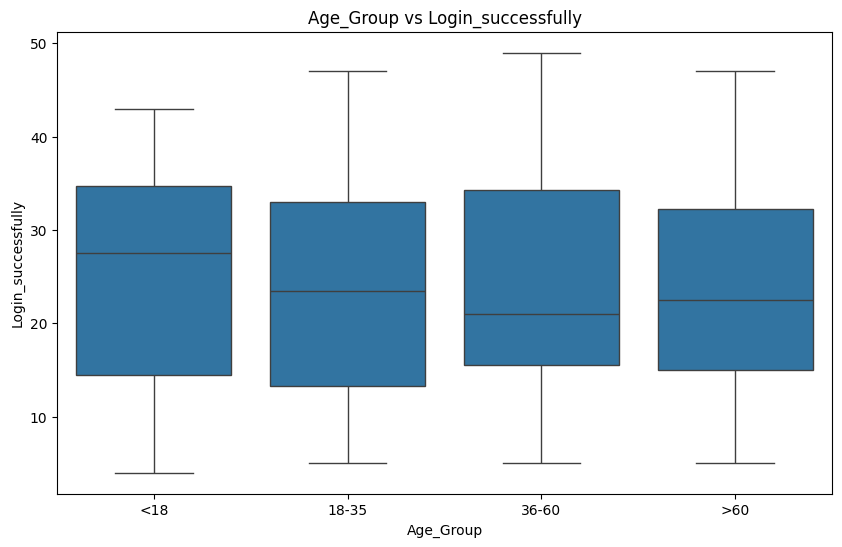

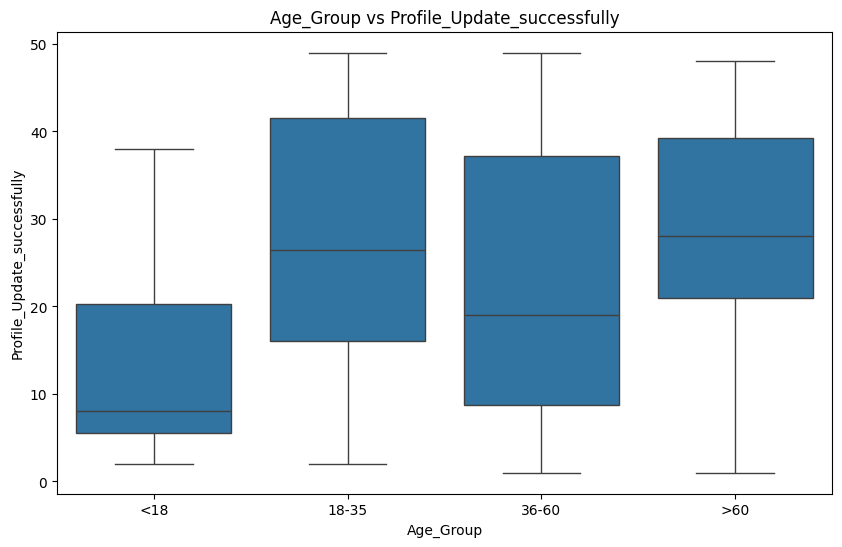

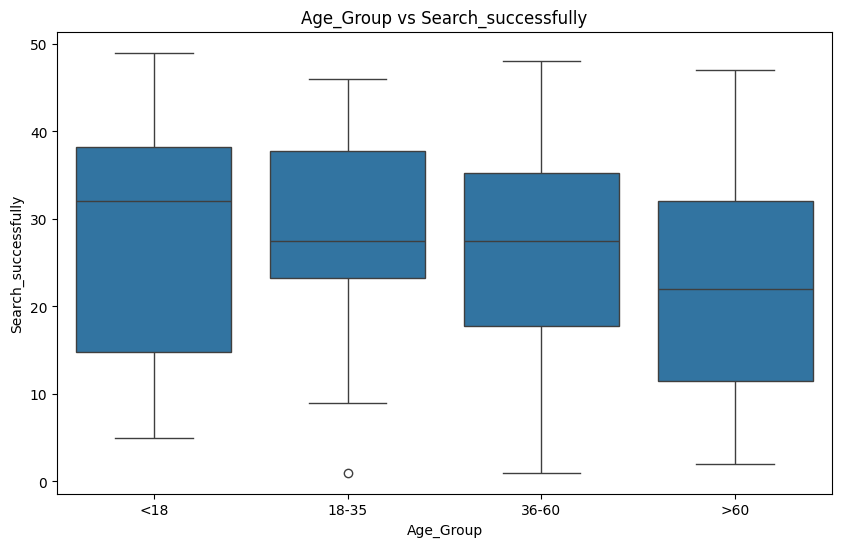

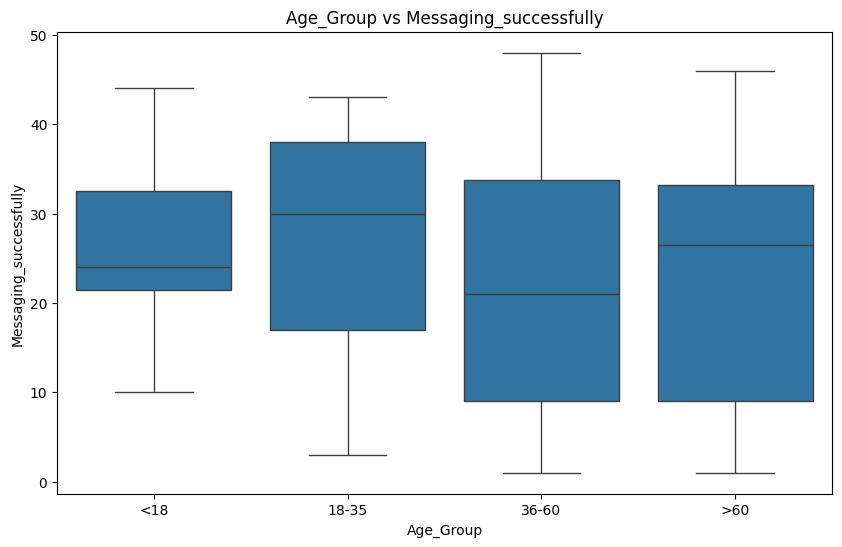

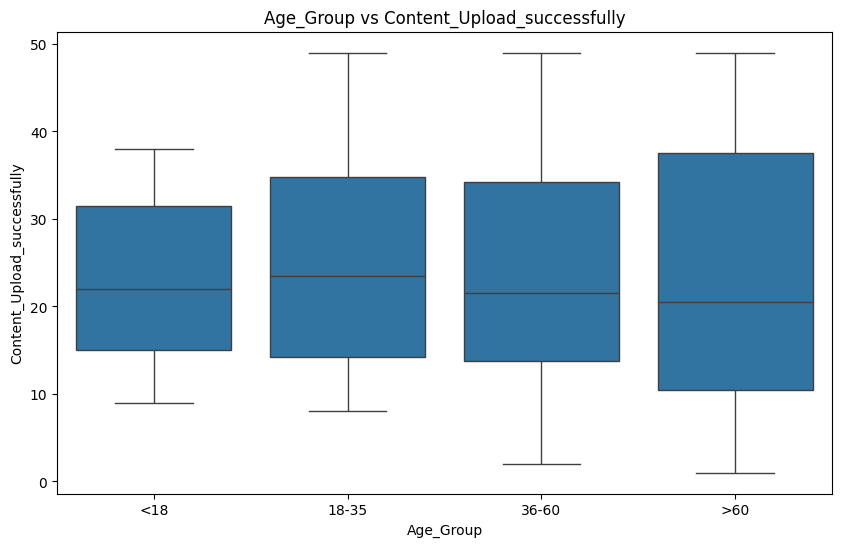

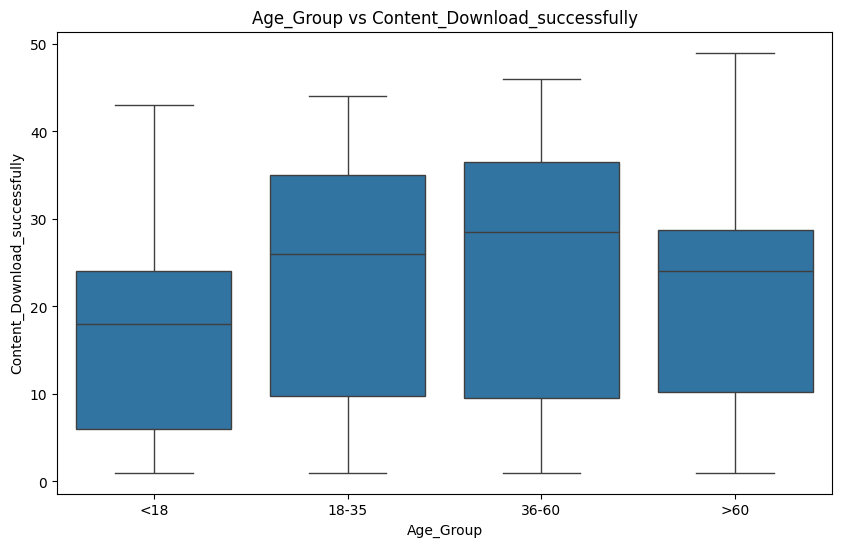

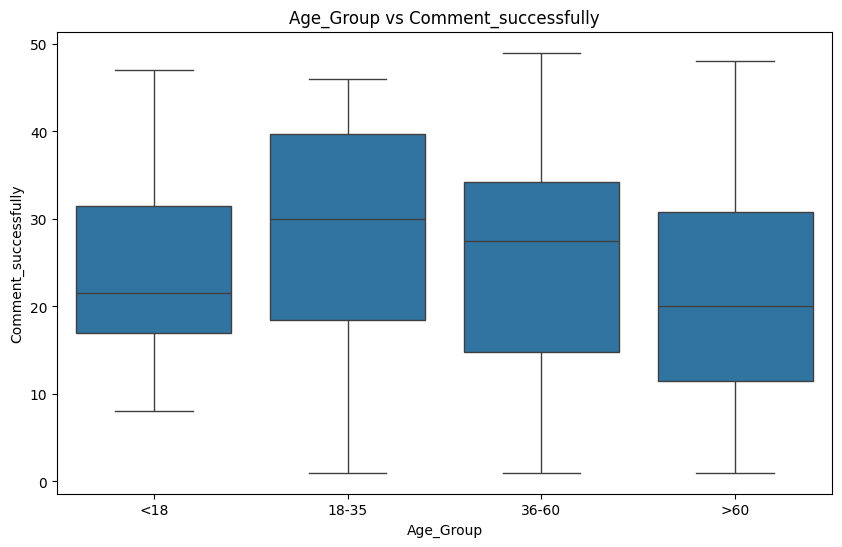

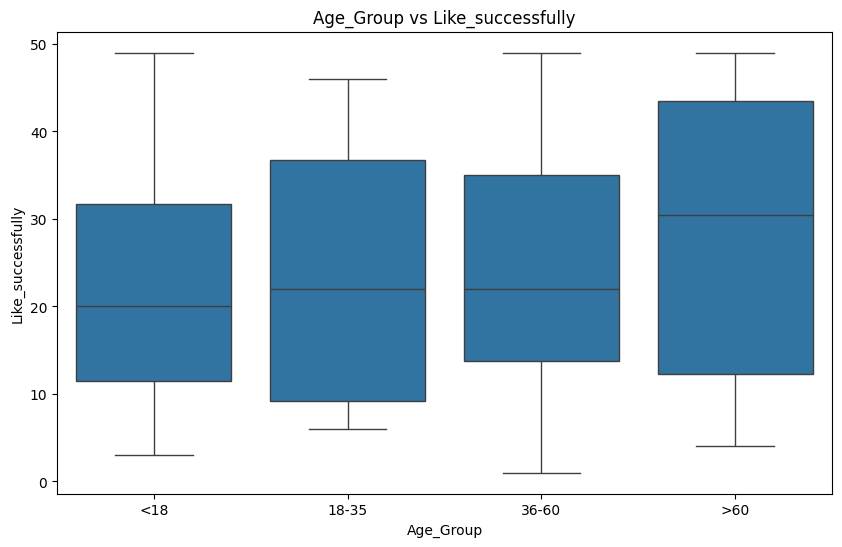

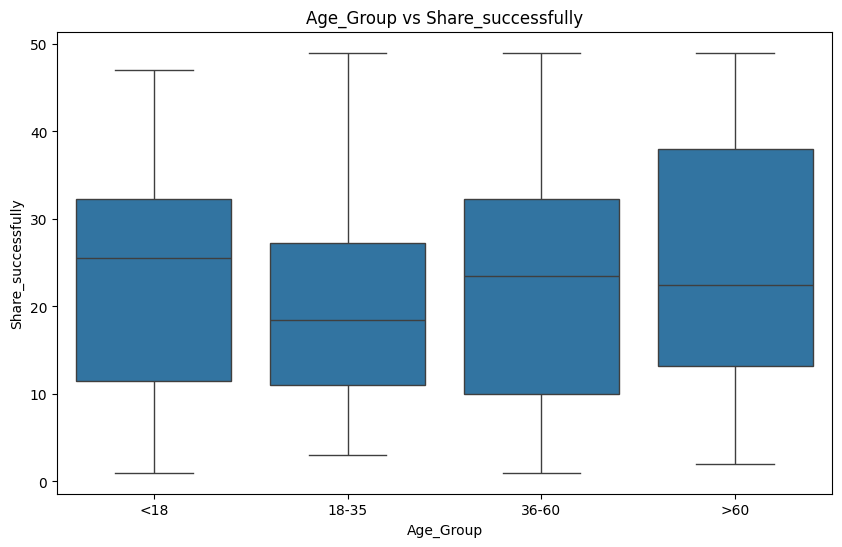

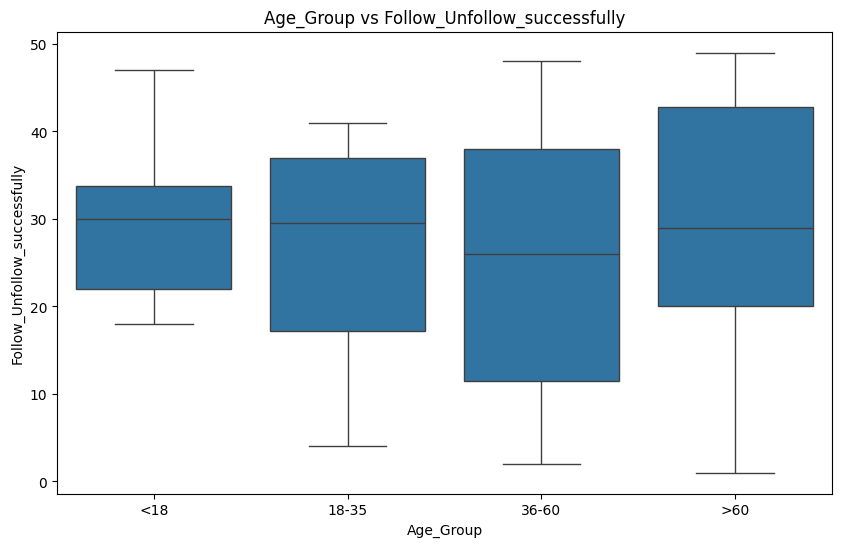

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot against 'Age_Group'
features = ['Login_successfully', 'Profile_Update_successfully', 'Search_successfully', 'Messaging_successfully', 'Content_Upload_successfully', 'Content_Download_successfully', 'Comment_successfully', 'Like_successfully', 'Share_successfully', 'Follow_Unfollow_successfully']

# For each feature, create a new figure and plot
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Age_Group', y=feature, data=df1)
    plt.title('Age_Group vs ' + feature)
    plt.show()


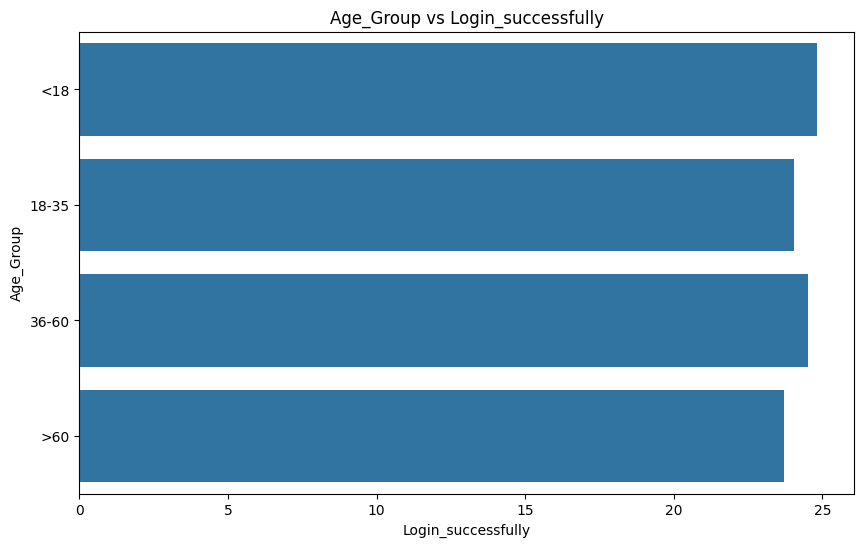

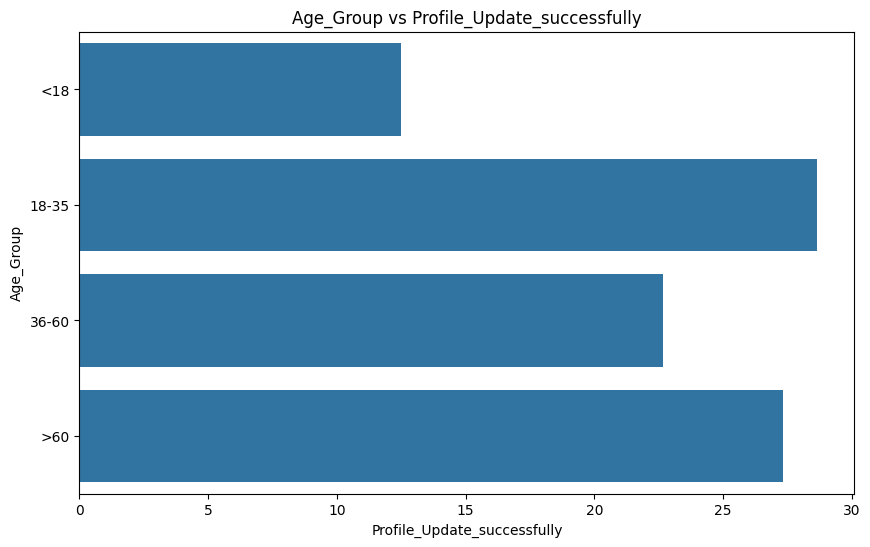

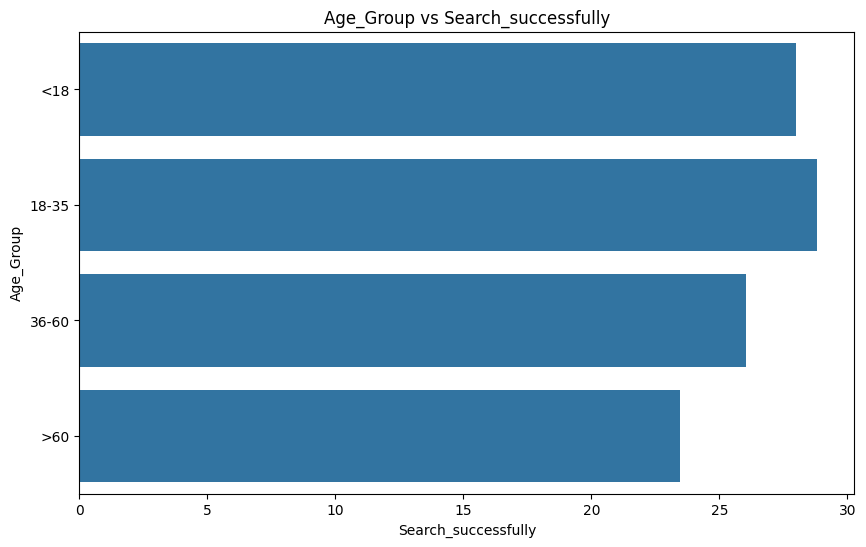

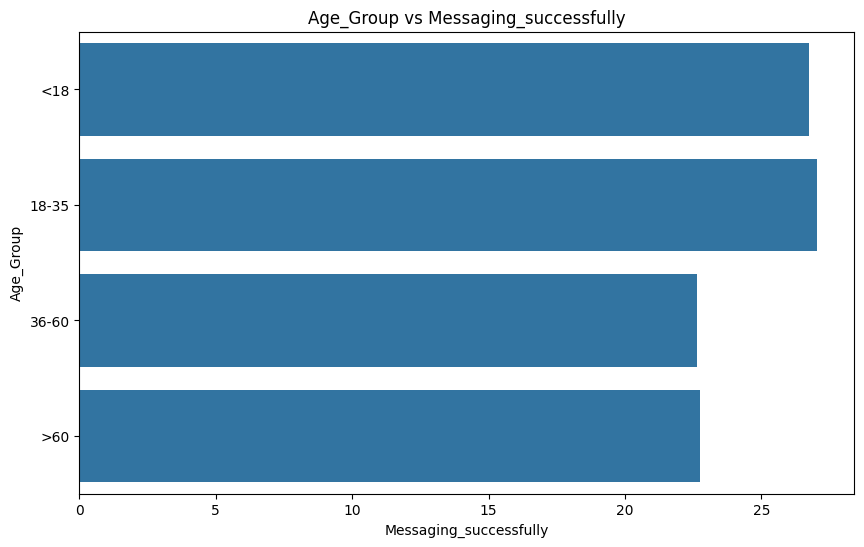

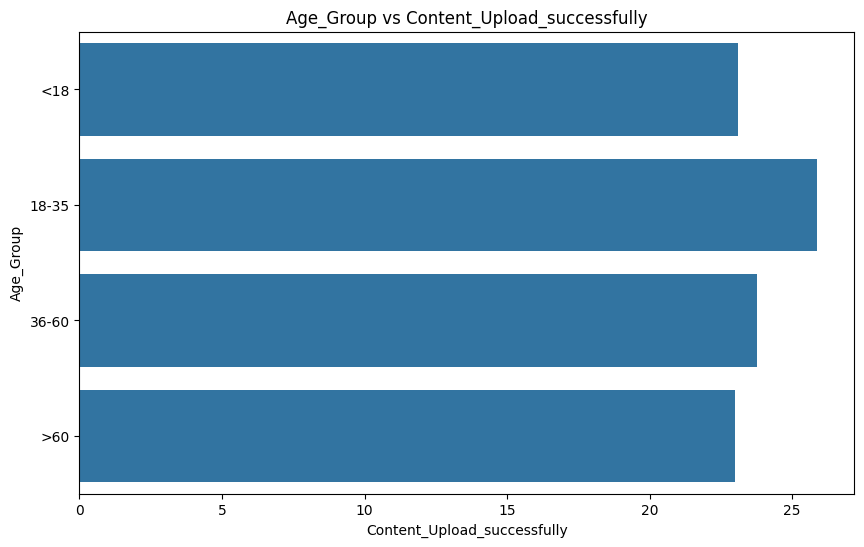

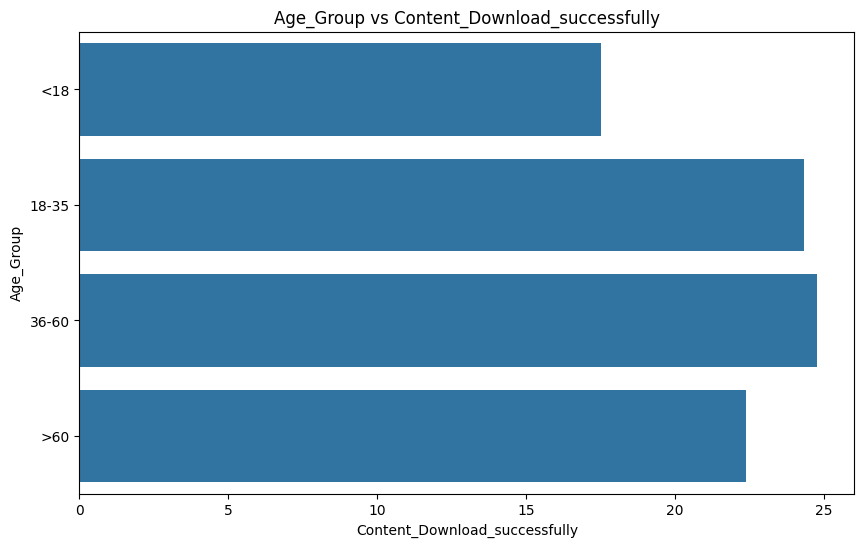

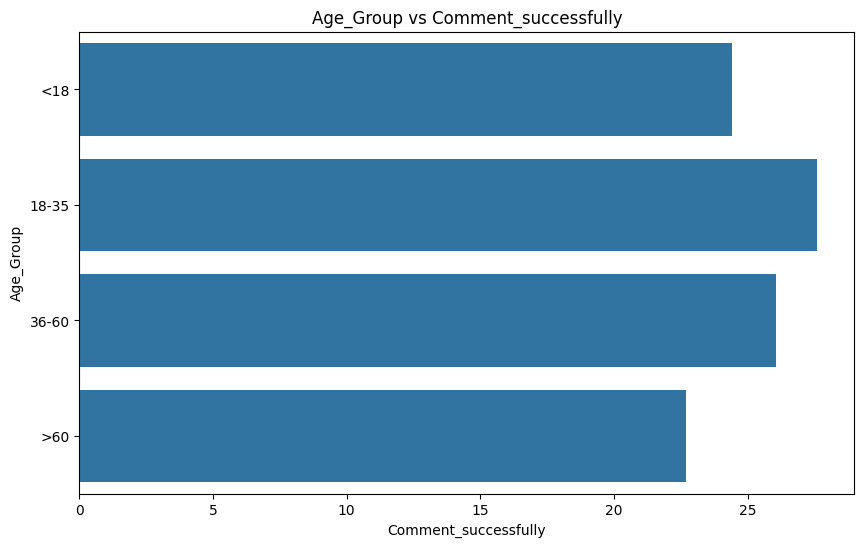

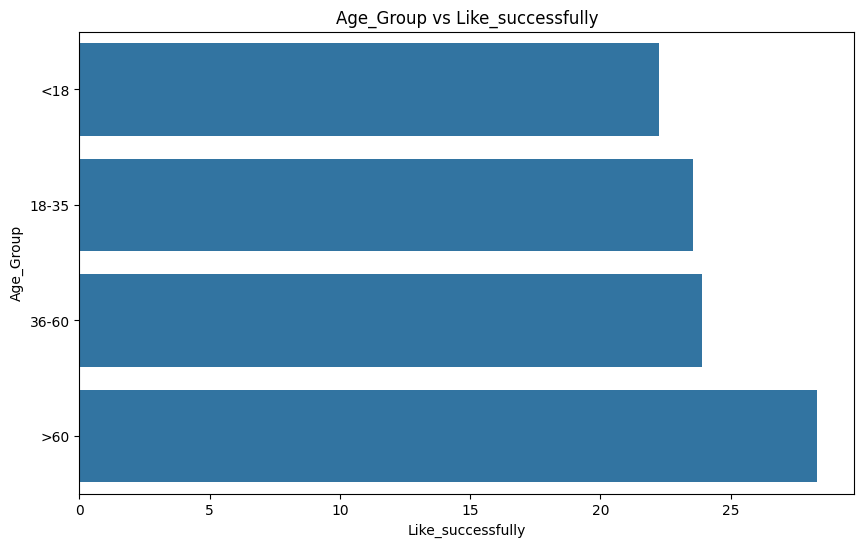

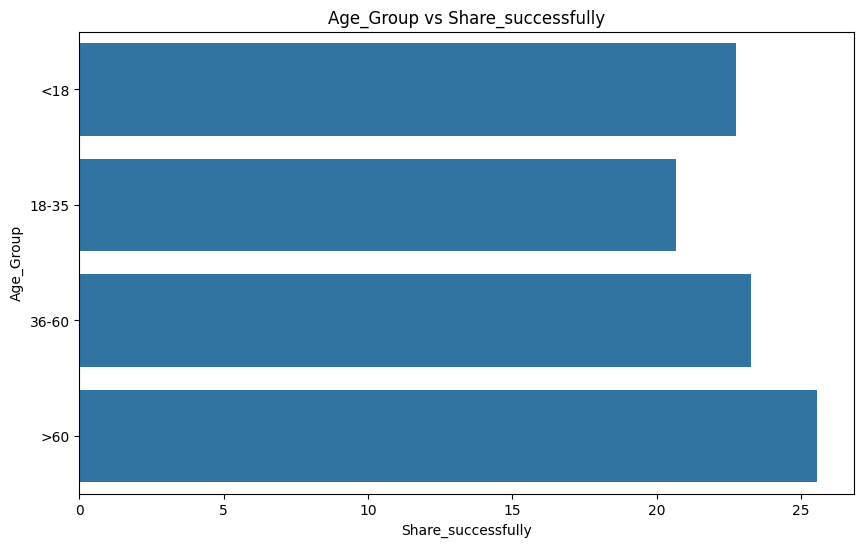

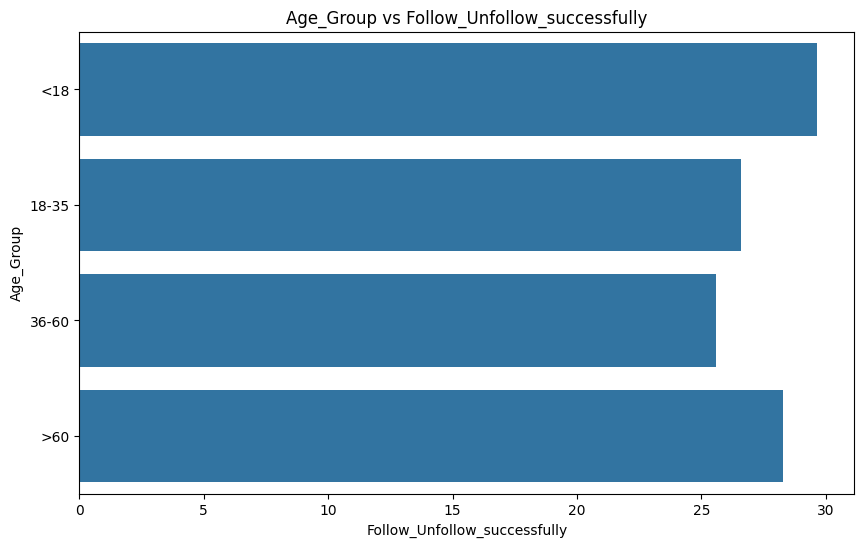

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot against 'Age_Group'
features = ['Login_successfully', 'Profile_Update_successfully', 'Search_successfully', 'Messaging_successfully', 'Content_Upload_successfully', 'Content_Download_successfully', 'Comment_successfully', 'Like_successfully', 'Share_successfully', 'Follow_Unfollow_successfully']

# For each feature, create a new figure and plot
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Age_Group', data=df1, errorbar=None)
    plt.title('Age_Group vs ' + feature)
    plt.show()


#**Histogram to see the sucessfull usage of the features**

In [ ]:
df1.head()

,User ID,Age,Gender,Location,Occupation,Login_successfully,Profile_Update_successfully,Search_successfully,Messaging_successfully,Content_Upload_successfully,...,Like_Usage_Count,Like_Usage_Duration,Share_Usage_Count,Share_Usage_Duration,Follow_Unfollow_Usage_Count,Follow_Unfollow_Usage_Duration,Tested_Feature,Change_Description,Age_Group,Total_Usage_Count
0,OPTTP,51,Female,TX,Doctor,26,38,21,22,17,...,71,15,77,203,70,79,Content_Upload,Multiple file uploads,36-60,566
1,8IFHD,58,Male,IL,Teacher,21,17,3,14,7,...,97,98,29,275,33,79,Messaging,New messaging features,36-60,581
2,PJXCK,57,Female,TX,Engineer,6,18,21,41,26,...,81,193,88,412,58,243,Search,New search algorithm,36-60,573
3,V9TC0,60,Male,IL,Doctor,47,43,31,41,13,...,86,111,51,391,74,339,Comment,New comment features,36-60,690
4,CAUCC,69,Female,TX,Engineer,8,44,37,43,19,...,31,432,85,257,36,303,Share,New sharing options,>60,528


# **Age vs Churned**

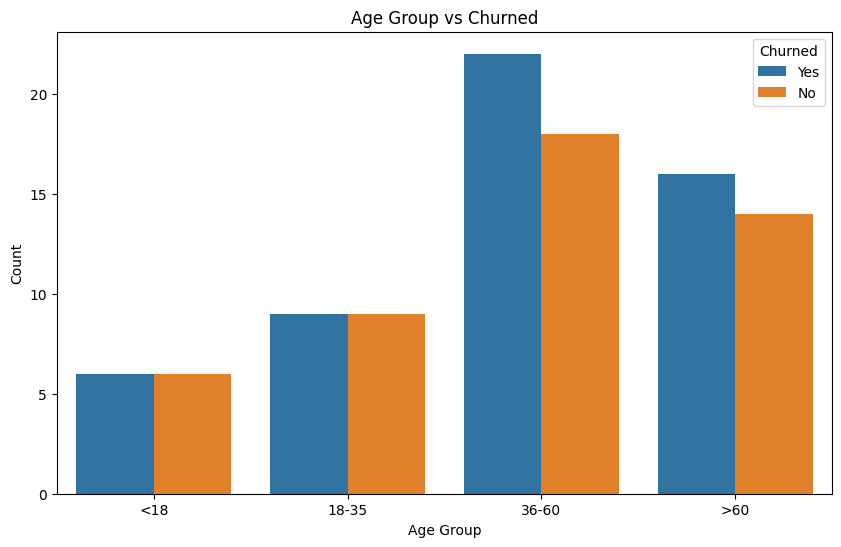

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10,6))
sns.countplot(x='Age_Group', hue='Churned', data=df1)

# Show the plot
plt.title('Age Group vs Churned')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


# **Gender Vs Churn**

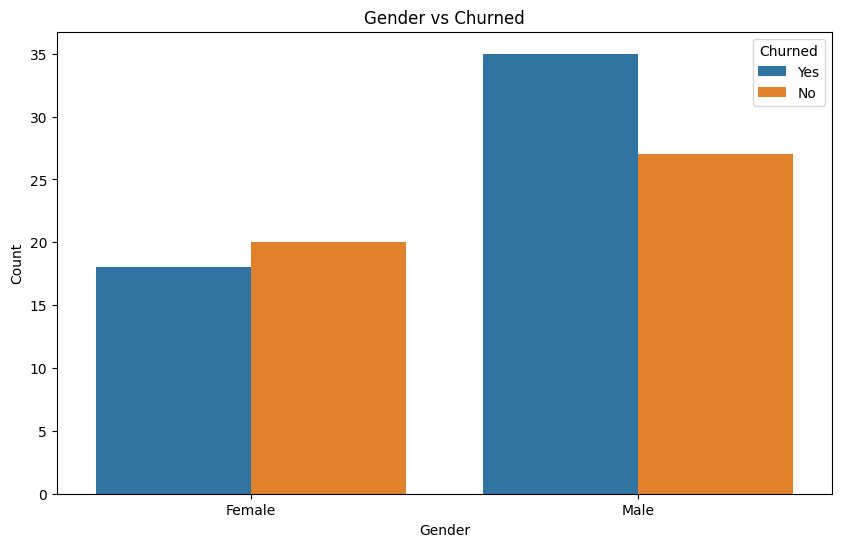

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Churned', data=df1)

# Show the plot
plt.title('Gender vs Churned')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##**Location Vs Churn**

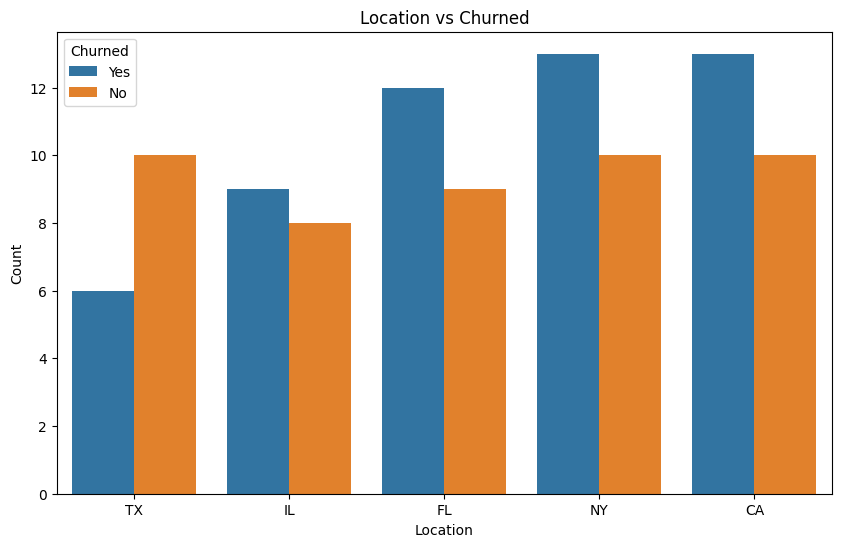

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10,6))
sns.countplot(x='Location', hue='Churned', data=df1)

# Show the plot
plt.title('Location vs Churned')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

### **Feature Engineering**

### Label-Encoding

In [ ]:
'''from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
cols_to_encode = ['Gender', 'Age_Group', 'Location', 'Occupation', 'User_Feedback', 'Support_Interaction', 'Churned', 'A/B_Test_Group','A/B_Test_Result']

# Apply the encoder to each column in cols_to_encode
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])'''


"from sklearn.preprocessing import LabelEncoder\n\n# Create a LabelEncoder object\nle = LabelEncoder()\n\n# List of columns to encode\ncols_to_encode = ['Gender', 'Age_Group', 'Location', 'Occupation', 'User_Feedback', 'Support_Interaction', 'Churned', 'A/B_Test_Group','A/B_Test_Result']\n\n# Apply the encoder to each column in cols_to_encode\nfor col in cols_to_encode:\n    df[col] = le.fit_transform(df[col])"

### One Hot Encoding

In [ ]:
# List of columns to encode
cols_to_encode = ['Gender', 'Age_Group', 'Location', 'Occupation', 'User_Feedback', 'Support_Interaction','A/B_Test_Group','A/B_Test_Result']

# Apply one-hot encoding to each column in cols_to_encode
df_encoded = pd.get_dummies(df1, columns=cols_to_encode)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
cols_to_encode = ['Churned']

# Apply the encoder to each column in cols_to_encode
for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
df_encoded['Churned']

0     1
1     0
2     0
3     0
4     1
     ..
95    1
96    1
97    0
98    1
99    1
Name: Churned, Length: 100, dtype: int64

## **Feature Selection**

In [ ]:
# List of columns to drop
cols_to_drop = ['Tested_Feature', 'Change_Description', 'Total_Usage_Count', 'User ID', 'Age', 'Account_Creation_Date', 'Last_Login_Date', 'Navigation_Path']

# Drop the columns
df_encoded = df_encoded.drop(cols_to_drop, axis=1)


In [ ]:
df_encoded.head()

,Login_successfully,Profile_Update_successfully,Search_successfully,Messaging_successfully,Content_Upload_successfully,Content_Download_successfully,Comment_successfully,Like_successfully,Share_successfully,Follow_Unfollow_successfully,...,Occupation_Manager,Occupation_Teacher,User_Feedback_Negative,User_Feedback_Positive,Support_Interaction_No,Support_Interaction_Yes,A/B_Test_Group_A,A/B_Test_Group_B,A/B_Test_Result_Negative,A/B_Test_Result_Positive
0,26,38,21,22,17,34,5,39,36,10,...,False,False,True,False,False,True,False,True,False,True
1,21,17,3,14,7,44,10,15,6,28,...,False,True,True,False,True,False,False,True,False,True
2,6,18,21,41,26,46,1,16,24,31,...,False,False,False,True,True,False,True,False,True,False
3,47,43,31,41,13,39,30,45,36,16,...,False,False,False,True,False,True,False,True,True,False
4,8,44,37,43,19,4,46,5,9,20,...,False,False,True,False,False,True,False,True,True,False


In [ ]:
df_encoded.columns

Index(['Login_successfully', 'Profile_Update_successfully',
       'Search_successfully', 'Messaging_successfully',
       'Content_Upload_successfully', 'Content_Download_successfully',
       'Comment_successfully', 'Like_successfully', 'Share_successfully',
       'Follow_Unfollow_successfully', 'Churned', 'Login_Usage_Count',
       'Login_Usage_Duration', 'Profile_Update_Usage_Count',
       'Profile_Update_Usage_Duration', 'Search_Usage_Count',
       'Search_Usage_Duration', 'Messaging_Usage_Count',
       'Messaging_Usage_Duration', 'Content_Upload_Usage_Count',
       'Content_Upload_Usage_Duration', 'Content_Download_Usage_Count',
       'Content_Download_Usage_Duration', 'Comment_Usage_Count',
       'Comment_Usage_Duration', 'Like_Usage_Count', 'Like_Usage_Duration',
       'Share_Usage_Count', 'Share_Usage_Duration',
       'Follow_Unfollow_Usage_Count', 'Follow_Unfollow_Usage_Duration',
       'Gender_Female', 'Gender_Male', 'Age_Group_<18', 'Age_Group_18-35',
       'Age

In [ ]:
'''#correlation diagram
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()'''


'#correlation diagram\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Calculate the correlation matrix\ncorr_matrix = df_encoded.corr()\n\n# Create a heatmap from the correlation matrix\nplt.figure(figsize=(15, 15))\nsns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=\'coolwarm\', cbar=True, square=True)\nplt.title(\'Correlation Matrix\')\nplt.show()'

In [ ]:
##variance threshold
from sklearn.feature_selection import VarianceThreshold

# Assume X is your feature set
X = df_encoded.drop('Churned', axis=1)

# Create a VarianceThreshold object
selector = VarianceThreshold(threshold=0.2)  # Change the threshold value as needed

# Fit the selector to the data
selector.fit(X)

# Get a boolean mask where True indicates the feature has variance above the threshold
mask = selector.get_support()

# Get the list of feature names
feature_names = X.columns

# Get the names of the features that have variance above the threshold
selected_features = feature_names[mask]

# Create a DataFrame with only the selected features
X_selected = X[selected_features]

# Now X_selected is a new DataFrame with only the features that have variance above the threshold
X_selected.head()


,Login_successfully,Profile_Update_successfully,Search_successfully,Messaging_successfully,Content_Upload_successfully,Content_Download_successfully,Comment_successfully,Like_successfully,Share_successfully,Follow_Unfollow_successfully,...,Age_Group_36-60,Age_Group_>60,User_Feedback_Negative,User_Feedback_Positive,Support_Interaction_No,Support_Interaction_Yes,A/B_Test_Group_A,A/B_Test_Group_B,A/B_Test_Result_Negative,A/B_Test_Result_Positive
0,26,38,21,22,17,34,5,39,36,10,...,True,False,True,False,False,True,False,True,False,True
1,21,17,3,14,7,44,10,15,6,28,...,True,False,True,False,True,False,False,True,False,True
2,6,18,21,41,26,46,1,16,24,31,...,True,False,False,True,True,False,True,False,True,False
3,47,43,31,41,13,39,30,45,36,16,...,True,False,False,True,False,True,False,True,True,False
4,8,44,37,43,19,4,46,5,9,20,...,False,True,True,False,False,True,False,True,True,False


In [ ]:
X_selected.columns

Index(['Login_successfully', 'Profile_Update_successfully',
       'Search_successfully', 'Messaging_successfully',
       'Content_Upload_successfully', 'Content_Download_successfully',
       'Comment_successfully', 'Like_successfully', 'Share_successfully',
       'Follow_Unfollow_successfully', 'Login_Usage_Count',
       'Login_Usage_Duration', 'Profile_Update_Usage_Count',
       'Profile_Update_Usage_Duration', 'Search_Usage_Count',
       'Search_Usage_Duration', 'Messaging_Usage_Count',
       'Messaging_Usage_Duration', 'Content_Upload_Usage_Count',
       'Content_Upload_Usage_Duration', 'Content_Download_Usage_Count',
       'Content_Download_Usage_Duration', 'Comment_Usage_Count',
       'Comment_Usage_Duration', 'Like_Usage_Count', 'Like_Usage_Duration',
       'Share_Usage_Count', 'Share_Usage_Duration',
       'Follow_Unfollow_Usage_Count', 'Follow_Unfollow_Usage_Duration',
       'Gender_Female', 'Gender_Male', 'Age_Group_36-60', 'Age_Group_>60',
       'User_Feedback_

## **Principal Component Analysis (PCA):**

In [ ]:
# Define PCA
pca = PCA(n_components=3)

# Fit PCA
pca.fit(X)

# Summarize components
print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)


Explained Variance: [0.14842603 0.13472392 0.12100797]
[[ 7.83187071e-03 -6.07848357e-03 -7.19608251e-03 -2.45783843e-03
  -8.60253821e-03  3.92985341e-03  1.41275026e-03 -1.58847359e-02
  -1.07568069e-03  1.17420803e-02 -4.30444158e-03  4.58569357e-01
  -3.64048101e-03 -6.36730434e-01  4.73084807e-04  9.96831920e-02
  -2.36035188e-02  1.36134929e-01 -1.43662081e-02 -1.86325340e-02
   1.44299074e-02 -1.03511571e-01  8.46372077e-03  4.53507065e-01
  -1.67451211e-02  1.61678744e-02  1.72747644e-02 -2.35883884e-01
   9.36630973e-03  2.84260119e-01 -3.08631318e-04  3.08631318e-04
   3.82376639e-04  2.99457476e-06 -2.25494495e-04 -1.59876718e-04
  -1.14490326e-05 -4.01449503e-04  2.06744874e-04  2.86112672e-04
  -7.99590100e-05  8.52976527e-06 -5.08531431e-04  1.50318316e-04
   3.20275946e-05  3.17655756e-04  6.86406304e-05 -6.86406304e-05
  -2.80181509e-04  2.80181509e-04  1.55070365e-04 -1.55070365e-04
   6.70676717e-05 -6.70676717e-05]
 [ 1.41254568e-02  3.53878789e-03 -1.79825932e-02  7

**Feature Importance from Tree-based Models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)


                            feature  importance
13    Profile_Update_Usage_Duration    0.043982
20     Content_Download_Usage_Count    0.043833
24                 Like_Usage_Count    0.041813
18       Content_Upload_Usage_Count    0.039772
11             Login_Usage_Duration    0.036762
7                 Like_successfully    0.036005
0                Login_successfully    0.035070
12       Profile_Update_Usage_Count    0.034751
25              Like_Usage_Duration    0.034329
23           Comment_Usage_Duration    0.034070
16            Messaging_Usage_Count    0.033100
8                Share_successfully    0.031196
19    Content_Upload_Usage_Duration    0.029087
21  Content_Download_Usage_Duration    0.028603
27             Share_Usage_Duration    0.027991
28      Follow_Unfollow_Usage_Count    0.027609
29   Follow_Unfollow_Usage_Duration    0.027396
15            Search_Usage_Duration    0.027151
5     Content_Download_successfully    0.026526
6              Comment_successfully    0



1. **Data Preprocessing**: Clean the data and handle missing values. Convert categorical variables into numerical ones using techniques like one-hot encoding.
2. **Feature Selection**: Use feature importance provided by the Random Forest model to select the most important features. The features with higher importance are being used the most by users.
3. **Model Training**: Train the Random Forest model on your preprocessed dataset.
4. **Model Evaluation**: Evaluate the model using appropriate metrics (like accuracy, precision, recall, F1-score, etc.) and confusion matrix.
5. **Interpretation**: Interpret the results. The features that contribute the most to the model’s decisions are the ones being used the most by the users. The features that contribute the least are not being loved by the users.
6. **Improvement Suggestions**: Based on the interpretation, suggest improvements. For example, if a feature is not being loved by users, the team could investigate why and make necessary changes to make it more appealing.

## **Train the Data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) ##used the X_selected from RFE

In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X_selected.columns).sort_values(ascending=False)

print("Feature importances:\n", feature_importances)

Feature importances:
 Profile_Update_Usage_Duration     0.080758
Comment_Usage_Duration            0.074084
Content_Download_Usage_Count      0.070718
Login_successfully                0.066020
Follow_Unfollow_successfully      0.062762
Comment_Usage_Count               0.060396
Profile_Update_Usage_Count        0.052189
Content_Download_successfully     0.051580
Like_Usage_Count                  0.051374
Like_successfully                 0.049129
Comment_successfully              0.047986
Search_successfully               0.047513
Follow_Unfollow_Usage_Duration    0.043354
Login_Usage_Duration              0.043283
Messaging_successfully            0.040747
Follow_Unfollow_Usage_Count       0.040435
Login_Usage_Count                 0.039888
Profile_Update_successfully       0.035437
Content_Upload_successfully       0.034139
Gender_Female                     0.008208
dtype: float64


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.21      0.43      0.29         7
           1       0.33      0.15      0.21        13

    accuracy                           0.25        20
   macro avg       0.27      0.29      0.25        20
weighted avg       0.29      0.25      0.24        20



In [ ]:
#confusion metrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[ 3  4]
 [11  2]]


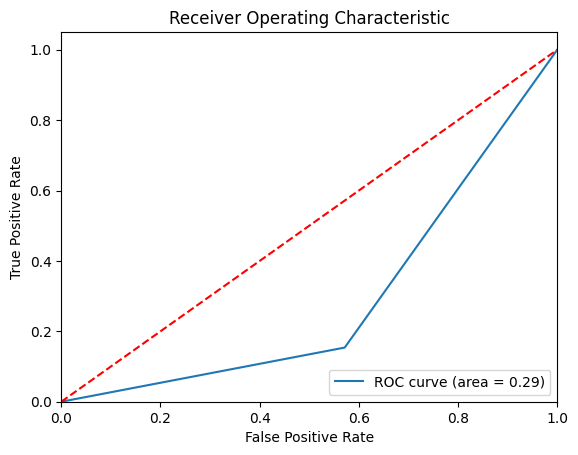

In [ ]:
#ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Get ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.60')

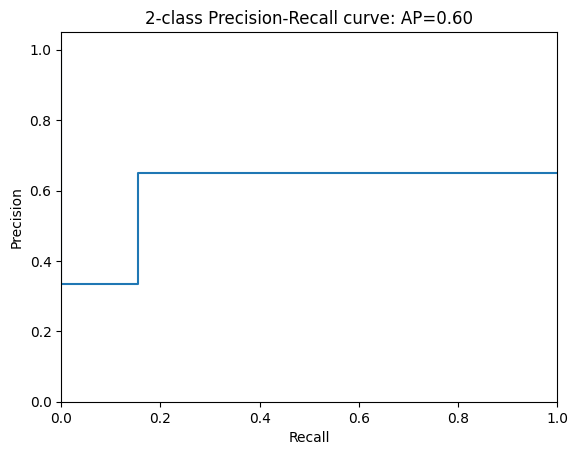

In [ ]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


To answer these questions, we would need to perform some exploratory data analysis and possibly some natural language processing on your dataset. Here's a high-level approach:

**1. Which features are being used the most and why?**
we can find this by analyzing the usage count columns ('Login_Usage_Count', 'Profile_Update_Usage_Count', etc.). The feature with the highest usage count is the most used feature. To understand why it's being used the most, you could analyze the 'Feedback', 'Reviews', and 'Survey Responses' for that feature.

**2. Which features are not being loved and why?**
This can be found by analyzing the 'Feedback', 'Reviews', and 'Survey Responses' columns. We might need to use some Natural Language Processing (NLP) techniques to understand the sentiment of the feedback and reviews. Features with more negative feedback or lower ratings might be the ones that are not being loved.

**3. What can the team do to improve their customers stickiness to the application?**
Improving customer stickiness could involve several strategies:
- Improving the features that are not being loved based on the feedback and reviews.
- Introducing new features that the users want. This can be found by analyzing the 'Feedback', 'Reviews', and 'Survey Responses' columns.
- Improving the user experience of the most used features so that users keep coming back to them.



**Which features are being used the most**

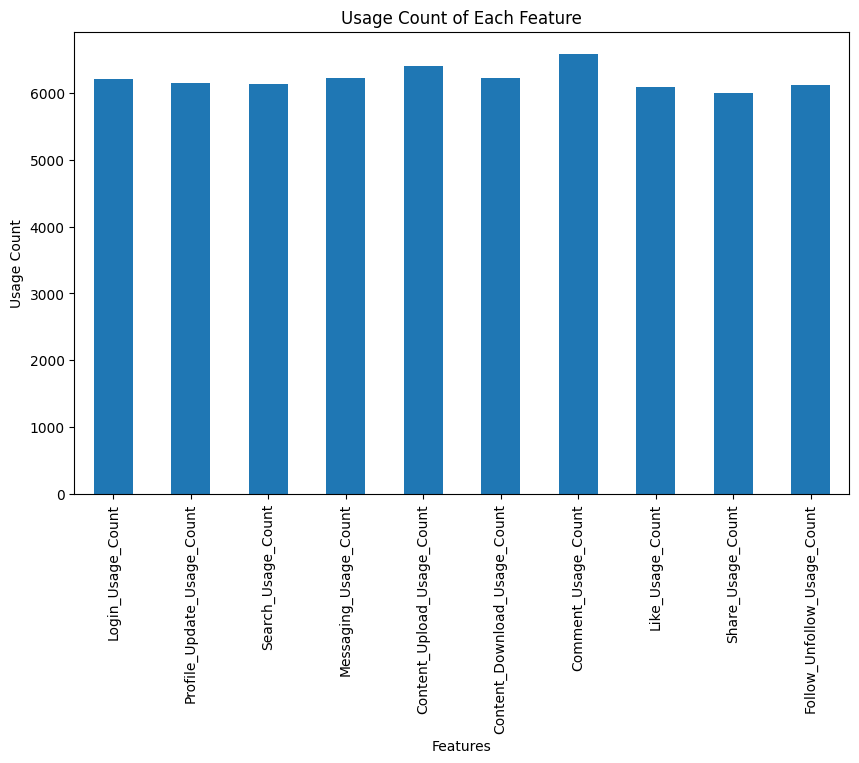

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# List of usage count columns
usage_count_columns = ['Login_Usage_Count', 'Profile_Update_Usage_Count', 'Search_Usage_Count',
                       'Messaging_Usage_Count', 'Content_Upload_Usage_Count', 'Content_Download_Usage_Count',
                       'Comment_Usage_Count', 'Like_Usage_Count', 'Share_Usage_Count', 'Follow_Unfollow_Usage_Count']

# Calculate the sum of each usage count column
usage_counts = df[usage_count_columns].sum()

# Create a bar plot
plt.figure(figsize=(10,6))
usage_counts.plot(kind='bar')
plt.title('Usage Count of Each Feature')
plt.xlabel('Features')
plt.ylabel('Usage Count')
plt.show()


**Which features are not being loved and why?**

#**1. Feature Usage Analysis:**

In [ ]:
# Calculate total usage count for each feature
usage_counts = df1[['Login_Usage_Count', 'Profile_Update_Usage_Count', 'Messaging_Usage_Count','Search_Usage_Count','Content_Upload_Usage_Count','Content_Download_Usage_Count','Comment_Usage_Count','Like_Usage_Count','Share_Usage_Count','Follow_Unfollow_Usage_Count']].sum()

# Calculate total usage duration for each feature
usage_durations = df1[['Login_Usage_Duration', 'Profile_Update_Usage_Duration','Messaging_Usage_Duration','Search_Usage_Duration','Content_Upload_Usage_Duration','Content_Download_Usage_Duration','Comment_Usage_Duration','Like_Usage_Duration','Share_Usage_Duration','Follow_Unfollow_Usage_Duration']].sum()

# Sort features by usage count and duration
most_used_features = usage_counts.sort_values(ascending=False)
most_used_durations = usage_durations.sort_values(ascending=False)

#print("Most Used Features by Usage:")
#print(most_used_features)

#print("\nMost Used Features by Duration:")
#print(most_used_durations)


# Display only the topmost feature for usage count and duration
print("Most Used Feature by Usage:")
print(most_used_features.head(1))

print("\nMost Used Feature by Duration:")
print(most_used_durations.head(1))

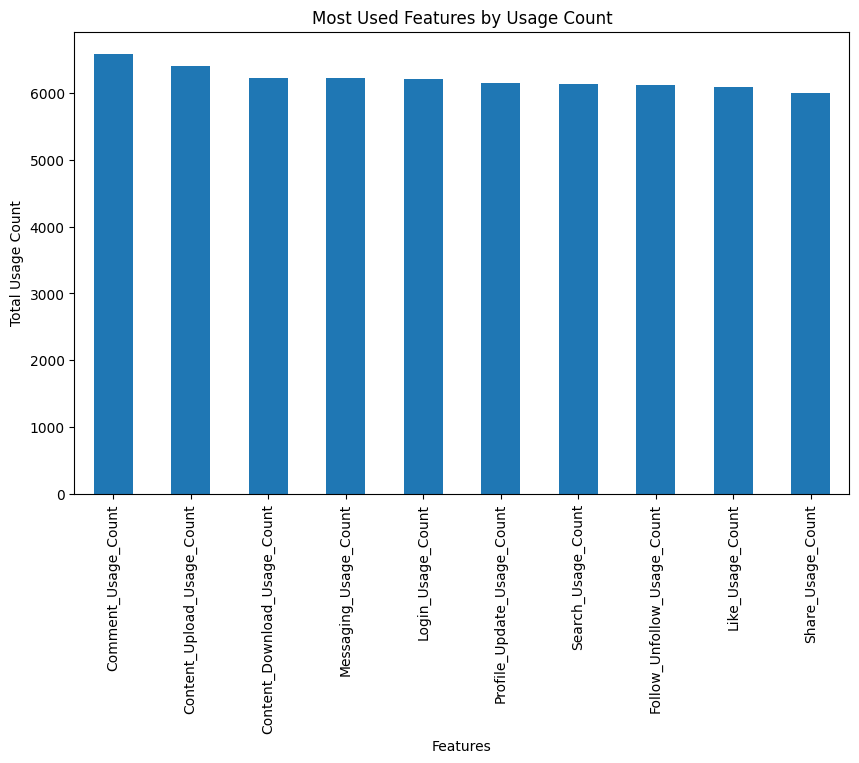

In [ ]:
import matplotlib.pyplot as plt

# Plot for Most Used Features by Usage Count
plt.figure(figsize=(10, 6))
most_used_features.plot(kind='bar')
plt.title('Most Used Features by Usage Count')
plt.xlabel('Features')
plt.ylabel('Total Usage Count')
plt.show()

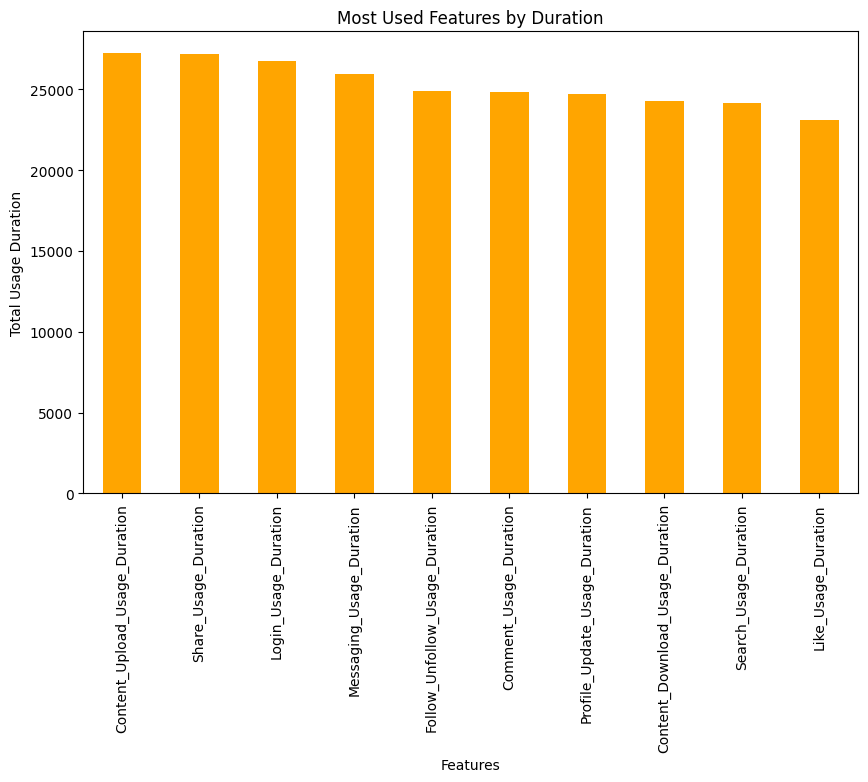

In [ ]:
# Plot for Most Used Features by Duration
plt.figure(figsize=(10, 6))
most_used_durations.plot(kind='bar', color='orange')
plt.title('Most Used Features by Duration')
plt.xlabel('Features')
plt.ylabel('Total Usage Duration')
plt.show()

# **2. Success Rate**

In [ ]:
# Calculate success rate for each feature
success_rates = df1[['Login_successfully','Profile_Update_successfully', 'Search_successfully','Messaging_successfully', 'Content_Upload_successfully', 'Content_Download_successfully', 'Comment_successfully','Like_successfully', 'Share_successfully','Follow_Unfollow_successfully']].mean()

# Sort features by success rate
most_successful_features = success_rates.sort_values(ascending=False)

print("Success Rate of Features:\n")
print(most_successful_features)




# **3. Demographic Usage Statistics of Different Features**

In [ ]:
# Define the features you want to analyze
usage_features = ['Login_Usage_Count', 'Profile_Update_Usage_Count', 'Messaging_Usage_Count','Search_Usage_Count','Content_Upload_Usage_Count','Content_Download_Usage_Count','Comment_Usage_Count','Like_Usage_Count','Share_Usage_Count','Follow_Unfollow_Usage_Count']

# Define age group categories
def categorize_age_group(age):
    if age < 18:
        return 'under 18'
    elif 18 <= age <= 25:
        return 'between 18 and 25'
    elif 26 <= age <= 35:
        return 'between 26 and 35'
    elif 36 <= age <= 55:
        return 'between 36 and 55'
    else:
        return 'above 55'

# Apply the age group categorization
df1['Age_Group'] = df1['Age'].apply(categorize_age_group)

# Group by demographic features including Age_Group and calculate mean usage stats for each feature
demographic_usage_stats = df1.groupby(['Age_Group', 'Gender', 'Location']).agg({feature: 'mean' for feature in usage_features})

# Reset index to turn the grouped DataFrame into a regular DataFrame
demographic_usage_stats = demographic_usage_stats.reset_index()


# Print the demographic usage stats
#print(demographic_usage_stats)

# Optionally, you can save this DataFrame to a new CSV file
demographic_usage_stats.to_csv('demographic_usage_stats.csv', index=False)


In [ ]:
# Assuming 'demographic_usage_stats' is already calculated as shown in the previous step

# Find the entry with the highest mean usage count across all features
highest_usage_stats = demographic_usage_stats.set_index(['Age_Group', 'Gender', 'Location']).idxmax().to_dict()

# Iterate over the features to print statements
for feature, index_values in highest_usage_stats.items():
    # Extract the feature name by removing '_Usage_Count'
    feature_name = feature.replace('_Usage_Count', '')

    age_group, gender, location = index_values
    print(f"The users of age group {age_group} and gender {gender} in {location} are most fond of {feature_name}.")


The users of age group between 18 and 25 and gender Female in CA are most fond of Login.
The users of age group between 26 and 35 and gender Female in CA are most fond of Profile_Update.
The users of age group between 18 and 25 and gender Male in NY are most fond of Messaging.
The users of age group under 18 and gender Female in TX are most fond of Search.
The users of age group between 26 and 35 and gender Female in FL are most fond of Content_Upload.
The users of age group between 26 and 35 and gender Male in NY are most fond of Content_Download.
The users of age group between 26 and 35 and gender Male in NY are most fond of Comment.
The users of age group under 18 and gender Female in TX are most fond of Like.
The users of age group above 55 and gender Female in TX are most fond of Share.
The users of age group between 36 and 55 and gender Female in NY are most fond of Follow_Unfollow.


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create dropdown widgets for Gender, Age_Group, and Location
gender_dropdown = widgets.Dropdown(options = demographic_usage_stats['Gender'].unique(), description='Gender:')
age_group_dropdown = widgets.Dropdown(options = demographic_usage_stats['Age_Group'].unique(), description='Age Group:')
location_dropdown = widgets.Dropdown(options = demographic_usage_stats['Location'].unique(), description='Location:')

# Display the dropdowns
#display(gender_dropdown, age_group_dropdown, location_dropdown)

# Function to filter the DataFrame based on selected dropdown values and display usage stats
def show_usage_stats(gender, age_group, location):
    filtered_df = demographic_usage_stats[(demographic_usage_stats['Gender'] == gender) &
                                          (demographic_usage_stats['Age_Group'] == age_group) &
                                          (demographic_usage_stats['Location'] == location)]

    # Check if the filtered DataFrame is not empty
    if not filtered_df.empty:
        # Select only numeric columns for calculating the mean
        numeric_columns = filtered_df.select_dtypes(include=[np.number]).columns.tolist()
        sorted_features = filtered_df[numeric_columns].mean().sort_values(ascending=False)

        # Get the most popular feature name
        most_popular_feature = sorted_features.index[0]

        # Generate the output statement
        output_statement = f"The most popular feature among {gender}s of age group '{age_group}' in {location} is '{most_popular_feature}' with an average usage count of {sorted_features.iloc[0]:.2f}."
        print(output_statement)
    else:
        print("No data available for the selected criteria.")

# Bind the function to the dropdowns' value changes
widgets.interactive(show_usage_stats, gender=gender_dropdown, age_group=age_group_dropdown, location=location_dropdown)


interactive(children=(Dropdown(description='Gender:', options=('Female', 'Male'), value='Female'), Dropdown(de…

# **4. A/B Test Analysis:**

In [ ]:
# List of columns to encode
cols_to_encode = ['A/B_Test_Result']

# Apply one-hot encoding to each column in cols_to_encode
df_encoded_new = pd.get_dummies(df1, columns=cols_to_encode)

In [ ]:
# Group by 'Tested_Feature' and calculate mean A/B test result
ab_test_results = df_encoded_new.groupby('Tested_Feature')[['A/B_Test_Result_Negative', 'A/B_Test_Result_Positive']].mean()


In [ ]:
# Print the A/B test results
print(ab_test_results)

                  A/B_Test_Result_Negative  A/B_Test_Result_Positive
Tested_Feature                                                      
Comment                           0.428571                  0.571429
Content_Download                  0.444444                  0.555556
Content_Upload                    0.200000                  0.800000
Follow_Unfollow                   0.272727                  0.727273
Like                              0.444444                  0.555556
Login                             0.272727                  0.727273
Messaging                         0.500000                  0.500000
Profile_Update                    0.300000                  0.700000
Search                            0.545455                  0.454545
Share                             0.200000                  0.800000


In [ ]:
# Group by 'Tested_Feature' and 'Change_Description' and calculate mean A/B test result
ab_test_grouped = df_encoded_new.groupby(['Tested_Feature', 'Change_Description'])['A/B_Test_Result_Positive'].mean()

# Find the entry with the highest A/B test result
highest_ab_test_result = ab_test_grouped.idxmax()
highest_ab_test_score = ab_test_grouped.max()

# Print the result in the specified format
print(f"Based on the users' utility, this feature '{highest_ab_test_result[0]}', for the following changes '{highest_ab_test_result[1]}' has scored the highest in A/B test : {highest_ab_test_score}")


Based on the users' utility, this feature 'Content_Upload', for the following changes 'Multiple file uploads' has scored the highest in A/B test : 0.8


In [ ]:
# Group by 'Tested_Feature' and 'Change_Description' and calculate mean A/B test result
ab_test_grouped = df_encoded_new.groupby(['Tested_Feature', 'Change_Description'])['A/B_Test_Result_Negative'].mean()

# Find the entry with the highest A/B test result
lowest_ab_test_result = ab_test_grouped.idxmax()
lowest_ab_test_score = ab_test_grouped.max()

# Print the result in the specified format
print(f"Based on the users' utility, this feature '{lowest_ab_test_result[0]}', for the following changes '{lowest_ab_test_result[1]}' has scored the lowest in A/B test : {lowest_ab_test_score}")


Based on the users' utility, this feature 'Search', for the following changes 'New search algorithm' has scored the lowest in A/B test : 0.5454545454545454
